<a href="https://colab.research.google.com/github/hamidrezanorouzi/numericalMethods/blob/main/Lectures/nonLinearEquations_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Solving non-linear equations - Part 1**

### **Notes**❕
This document is a part of the course lectures of **`numerical methods in chemical engineering`** for B.Sc. students of chemical engineering at Amirkabir university of Technology.

You can use the content and the source codes in this document with proper referencing the original document.

All the art-work contents of this document are obtained from the
following sources, unless otherwise stated:
* Steven C. Chapra, Applied Numerical Methods with Matlab for Engineers and Scientists, 3rd edition, McGraw-Hill (2012).


<div align="center">
🟥 🟥 🟥
</dive>

---



# 🔵 1) Some applications in chemical engineering
## 1-1) Finding molar volume using EOS
* Solving equations of state (EOS) for finding the vapor and/or liquid molar volume (copressibility factor).
* Consider Peng-Robinson EOS:

$$
P = \frac{RT}{v-b}-\frac{aα}{v^2+2bv-b^2} \tag{1-1}
$$
* This equation can be re-arrange to give $Z=\frac{Pv}{RT}$ with known T and P:
$$
Z^3 - (1-B)Z^2 + (A-2B-3B^2)Z - (AB-B^2-B^3)=0  \\
A = \frac{\alpha aP}{R^2T^2} \\
B = \frac{bP}{RT}
\tag{1-2}
$$




<div align="center">
<img src="https://drive.google.com/uc?id=12zuK6cvE-XoGXIX0feBcWikY_ieIQAJz" width="400" />
</div>


## 1-2) Finding friction factor in pipes
* In hydraulic calculation in chemical engineering we offten face with finiding the friction factor, *f*, using a correlation and then calculating the pressure drop in a pipe:
$$
ΔP = f\frac{L}{D}(\frac{1}{2}ρV^2) \tag{1-3}
$$
  - V is the fluid velocity
  - $\rho$ is the fluid density
  - L is the pipe length
  - D is the pipe diameter
* Given **Re** number and **$\epsilon/D$**, the friction factor is obtained by **Colebrook** equation:
$$
\frac{1}{\sqrt{f}}= -2log(\frac{ϵ}{3.7D}+\frac{2.51}{Re \sqrt{f}}) \tag{1-4}
$$
&nbsp;
<div align="center">
<img src="https://drive.google.com/uc?id=1c6XNwEiG8lvYKIsF-d4akCQ_qsIP_qY9" width="500" />
</div>


<div align="center">
🟦 🟦 🟦
</div>


---



# 🟡 2) Graphical Method
* The simplest way to find the roots of an equation is to plot it over the entire range of our interest to find approximate roots of the equation.
* Ploting an equation (if possible) is useful for finding the interval in which a root exists and number of roots.

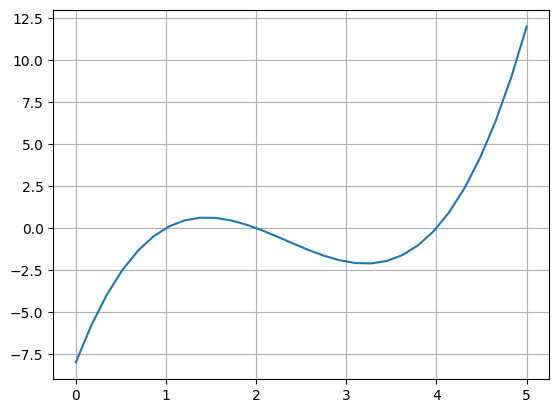

In [36]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(start=0, stop=5, num =30)
y = pow(x,3)-  7*pow(x,2) + 14*x - 8
plt.plot(x,y)
plt.grid()

# 🔴 3) Finding intervals containing root
* It is based on a simple property of function around the root: **change of sign**.
* if $f(x)$ is a **continuous function** and it has **one root** in interval [a,b], we have:
$$
f(a)f(b) < 0 \tag{3-1}
$$
* The interval is divided into n sub-intervals and the possibility of existance of root in each of these sub-intervals is tested.

number of intervals is  9


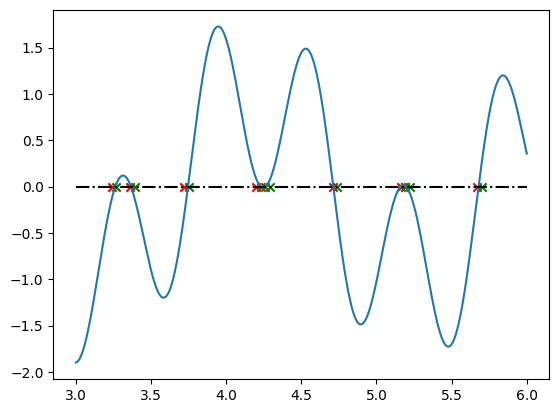

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

def findRootInterval(fx, xmin, xmax, n=10):
  h = (xmax - xmin)/n
  xs = xmin;
  fxs = fx(xs)
  intervals = []
  for i in range(n):
    xe = xs + h
    fxe = fx(xe)
    if fxs*fxe <= 0:
      intervals.append([xs, xe])
    xs = xe
    fxs = fxe
  return intervals

def fx(x):
  return math.sin(10*x)+math.cos(3*x)

xmin = 3
xmax = 6
n = 100

x = np.linspace(xmin,xmax, 10*n)
y = [fx(xi) for xi in x]

plt.plot(x,y)

intervals = findRootInterval(fx, xmin, xmax , n)
intervals_arr = np.asarray(intervals);
nInterval = len(intervals)
y0 = np.zeros(nInterval)
x0 = np.linspace(xmin,xmax,nInterval)
plt.plot(x0,y0, '-.k')

plt.scatter(intervals_arr[:,0],y0, marker='x',c='r')
plt.scatter(intervals_arr[:,1],y0, marker='x',c='g')

print("number of intervals is ", nInterval)


<div align="center">
🟥 🟥 🟥
</div>


---



# 🟢 4) Bisection method
* Assume $f(x)$ is a $R⇒R$ continuous function and there are two numbers a and b where $f(a)f(b)<0$. Then, this function has at least one zero in this interval.
* This method is based on the finding these two numbers and dividing the interval into two equal sub-intervals and keeping the sub-interval at which $f(x)$ changes sign and repeating this procedure until a certain limit.

<div align="center">
<img src="https://drive.google.com/uc?id=1zukhCuUcB1rpVAa_ZCOfTDKm-eR53WU2" width="800"/>
</div>

## 4-1) Algorithm
* The algorithm for bisection method can be something as follows:

1.   Get a, b, tol
2.   Check if f(a)f(b) > 0
 *   **True**: no root can be found
3. x_mid = (a+b)/2
4. if abs(f(x_mid))<tol
 * root is x_mid, report
5. if f(a)f(x_mid) < 0
 * **True**: b = x_mid
 * **False**: a = x_mid
6. Calculate approximate error
 * err = abs((x_mid - x_mid_0)/x_mid)
 * Fix the program for x_mid near zero
7. if err < tol
 * **True**: root is x_mid, report
 * **False**: go to 3




## 4-2) Code for bisection method

* You can find the bisection method code in [matlab here](https://github.com/hamidrezanorouzi/numericalMethods/blob/main/matlab/bisection.m) or in [python here](https://github.com/hamidrezanorouzi/numericalMethods/blob/main/python/Root/bisection.py).  

In [ ]:
import math

def Bisection(f, a, b, tol = 0.001, maxIter = 100):

  fa = f(a)
  fb = f(b)
  x_mid_0 = a;

  if fa * fb > 0 :
    raise Exception(f'No root can be found in interval [{a},{b}]')

  for iter in range(maxIter):
    x_mid = (a + b) / 2
    fx_mid = f(x_mid)

    if fa * fx_mid < 0 :
      b = x_mid
      fb = fx_mid
    else:
      a = x_mid
      fa = fx_mid

    if abs(x_mid)>1.0e-15 :
      ea = abs( (x_mid - x_mid_0) / x_mid)
    x_mid_0 = x_mid

    if abs(fx_mid) < tol or ea < tol:
      return (x_mid, ea, iter+1)

  raise Exception(f'No root can be found in interval [{a},{b}]'
                  f' after {maxIter} iterations')
  return 0;

def fx(x):
  return x*math.sin(2*x)

intervals = findRootInterval(fx, 0.1, 7 , 10)
print(intervals)
for interval in intervals:
  root = Bisection(fx, interval[0], interval[1], tol = 1.0e-5 )
  print(root)

### ❓ **Example 1:**
Find the root of function $f(x) = 8-4.5(x-sin(x))$ in the interval [2,3] with tol = 0.5 % using bisection method.

💡 *Solution*

We start we a = 2 and b = 3 and narrowing the interval based on the bisection method.

| Iteration  | a | b  | $x_{mid}$ | f(a) | f(b) | f($x_{mid}$)| error %
| :---  |    :----:   | :---: | :---: |:---: |:---: |:---: |:---: |
| 1     | 2.0000      | 3.0000   | **2.5000**|3.0918 |-4.8650 |-0.55688| N.A.|
| 2     | 2.0000      | 2.5000   | **2.2500**|3.0918 |-0.55688|1.3763 | 11.11|
| 3     | 2.2500      | 2.5000   | **2.3750**|1.3763 |-0.55688| 0.43408| 5.26%|
| 4     | 2.3750      | 2.5000   | **2.4375**|0.43408|-0.55688|-0.055709| 2.56%|
| 5     | 2.3750      | 2.4375   | **2.4063**|0.43408|-0.055709|0.19066| 1.30%|
| 6     | 2.4063      | 2.4375   | **2.4219**|0.19066|-0.055709|0.067641| 0.64%|
| 7     | 2.4219      | 2.4375   | **2.4297**|0.067641|-0.055709|0.0060556| 0.32%|

Testing the solution using the code.

In [35]:
import math
def exp1Dx(x):
  return 8-4.5*(x-math.sin(x))

print(Bisection(exp1Dx, 2,3, tol = 0.005 ))

(2.4296875, 0.003215434083601286, 7)


## 4-3) Properties of bisection method
* The method always converges to an answer, provided a root exists
in the interval [a, b].
* The method may fail when the function is tangent to the axis and
does not cross the x-axis at $f(x) = 0$.
* The method **converges slowly** relative to other methods.
* Let $x^*$ be the true value of the root in [a,b].  Let $a_n$, $b_n$ and $x_n$ be the values of a, b and $x_{mid}$ on the $n^{th}$ iteration of the algorithm. The error is bounded by:

$$
E_t= |x^*-x_n| \leq \frac{b-a}{2^n}  \tag{3-2}
$$

* The number of iterations to obtain the answer with a certain error is obtained by:
$$
n \geq \frac{ln(\frac{b-a}{E_t})}{ln2} \tag{3-3}
$$


<div align="center">
🟩 🟩 🟩
</div>


---



# 🟣 5) False position method
* It is similar to bisection method, except that it uses a line connecting the end points of the interval to find the new estimate of the root.
* The equation of the line is:
$$
y = \frac{f(b)-f(a)}{b-a}(x-b)+f(b) \tag{5-1}
$$
* The point x_i where the line intersects the x-axis is obtained by:
$$
x_i = \frac{af(b)-bf(a)}{f(b)-f(a)} \tag{5-2}
$$



<div align="center">
<img src="https://drive.google.com/uc?id=1Dt9XW3K5XtyrGT4Cw-9aFDH9C97r_dp0" width = "800">
</div>

In [6]:
import math
import sys

def falsePosition(f, a, b, tol = 0.001, maxIter = 100):

  fa = f(a)
  fb = f(b)
  x_i_0 = a;

  if fa * fb > 0 :
    sys.exit(f'No root can be found in interval [{a},{b}]')

  for iter in range(maxIter):
    x_i = (a*fb - b*fa) / (fb-fa)
    fx_i = f(x_i)

    if fa * fx_i < 0 :
      b = x_i
      fb = fx_i
    else:
      a = x_i
      fa = fx_i

    if abs(x_i)>1.0e-15 :
      ea = abs( (x_i - x_i_0) / x_i)
    x_mid_0 = x_i

    if abs(fx_i) < tol or ea < tol:
      return (x_i, ea, iter+1)

  sys.exit(f'No root can be found in interval [{a},{b}]'
                  f' after {maxIter} iterations')
  return 0;

def fx(x):
  return x*math.sin(2*x)

intervals = findRootInterval(fx, 0.1, 7 , 10)
print(intervals)
for interval in intervals:
  root = falsePosition(fx, interval[0], interval[1], tol = 1.0e-5 )
  print(root)

[[1.48, 2.17], [2.86, 3.55], [4.24, 4.930000000000001], [5.620000000000001, 6.310000000000001]]
(1.5707960818593842, 0.057802589978393014, 5)
(3.141592624481785, 0.08963371707948123, 4)
(4.7123888320294345, 0.1002440267277341, 4)
(6.283185102594846, 0.10554919069962798, 3)


### ❓ **Example 2:**
Find the root of function $f(x) = 8-4.5(x-sin(x))$ in the interval [2,3] with tol = 0.5 % usign false position method.

💡 *Solution*

We start we a = 2 and b = 3 and narrowing the interval based on the bisection method.

| Iteration  | a | b  | $x_{mid}$ | f(a) | f(b) | f($x_{mid}$)| error %
| :---  |    :----:   | :---: | :---: |:---: |:---: |:---: |:---: |